In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functions import make_numpy_array_dat, plot_linear, chi_squared
import os
import glob
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [2]:
plt.style.use('classic')
np.set_printoptions(suppress = True)
warnings.filterwarnings('ignore')

In [3]:
all_files = os.listdir('.')
dat_files_1000 = sorted(glob.glob('*1000.dat'))
dat_files_100 = list(sorted((filter(lambda x: x not in dat_files_1000 + ['__pycache__', 'functions.py', 'lin_100.ipynb', 'lin_1000.ipynb'], all_files))))
    
print(all_files)
print(dat_files_100)

dy_low, dy_high, X_train, X_test, y_train = [make_numpy_array_dat(dat_files_100[i]) for i in range(len(dat_files_100))]

dy_low = dy_low[dy_low > 0]
dy_high = dy_high[dy_high > 0]

['y1_lin.dat', 'y1_lin_ntot_1000.dat', 'x1_lin_ext.dat', '__pycache__', 'ey1_lin_high.dat', 'lin_1000.ipynb', 'x1_lin_ext_ntot_1000.dat', 'ey1_lin_high_ntot_1000.dat', 'x1_lin.dat', 'functions.py', 'ey1_lin.dat', 'output.png', 'x1_lin_ntot_1000.dat', 'lin_100.ipynb', 'ey1_lin_ntot_1000.dat']
['ey1_lin.dat', 'ey1_lin_high.dat', 'output.png', 'x1_lin.dat', 'x1_lin_ext.dat', 'y1_lin.dat']


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte

In [ ]:
print(f'Dy low shape: {dy_low.shape}')
print(f'Dy high shape: {dy_high.shape}')
print(f'X train shape: {X_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'y train shape: {y_train.shape}')

Dy low shape: (100,)
Dy high shape: (100,)
X train shape: (100,)
X test shape: (100,)
y train shape: (100,)


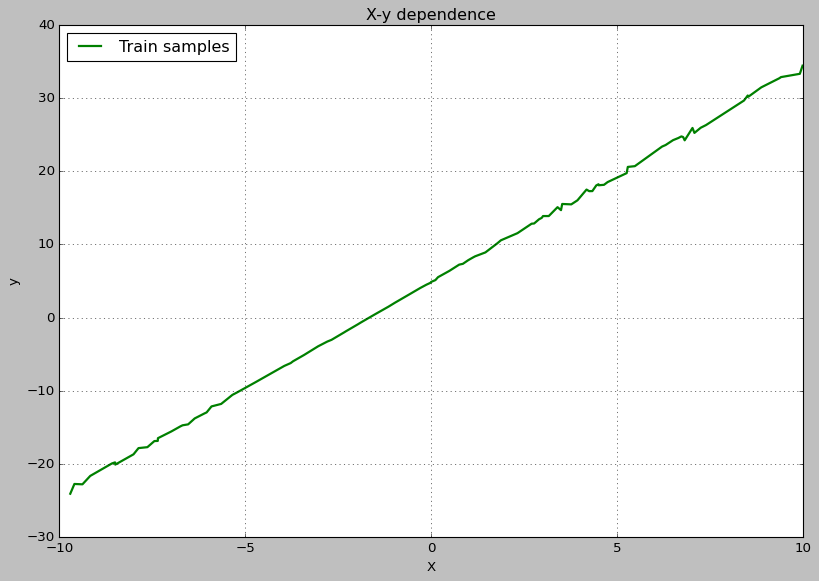

In [ ]:
plt.figure(figsize = (12,8))
sns.lineplot(x = X_train, y = y_train, lw = 2, color = 'green', label = 'Train samples')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)
plt.title('X-y dependence')
plt.legend(loc = 'upper left')
plt.show();

In [ ]:
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 42)

indexes_of_val = []
for i in range(X_val.shape[0]):
    indexes_of_val.append(np.where(X_train == X_val[i]))
indexes_of_val = np.array(list(map(lambda x: x[0], indexes_of_val))).flatten()
len(indexes_of_val)
indexes_of_val

array([83, 53, 70, 45, 44, 39, 22, 80, 10,  0])

In [ ]:
lm = LinearRegression()
lm.fit(X_train_split.reshape(-1,1), y_train_split)

LinearRegression()

In [ ]:
y_val_pred = lm.predict(X_val.reshape(-1,1))
print(len(y_val_pred))
y_pred = lm.predict(X_test.reshape(-1,1)) # for future extrapolation

10


In [ ]:
print(f'MSE: {mean_squared_error(y_val, y_val_pred)}')
print(f'R2 score: {r2_score(y_val, y_val_pred)}')
chi_squared_low = chi_squared(y_val, y_val_pred, dy_low[indexes_of_val])
chi_squared_high = chi_squared(y_val, y_val_pred, dy_high[indexes_of_val])
print(f'Chi Squared-low: {chi_squared_low}')
print(f'Chi Squared-high: {chi_squared_high}')

MSE: 0.08259653300046921
R2 score: 0.999254275183694
Chi Squared-low: 0.19543926417827606
Chi Squared-high: 0.021715473383665085


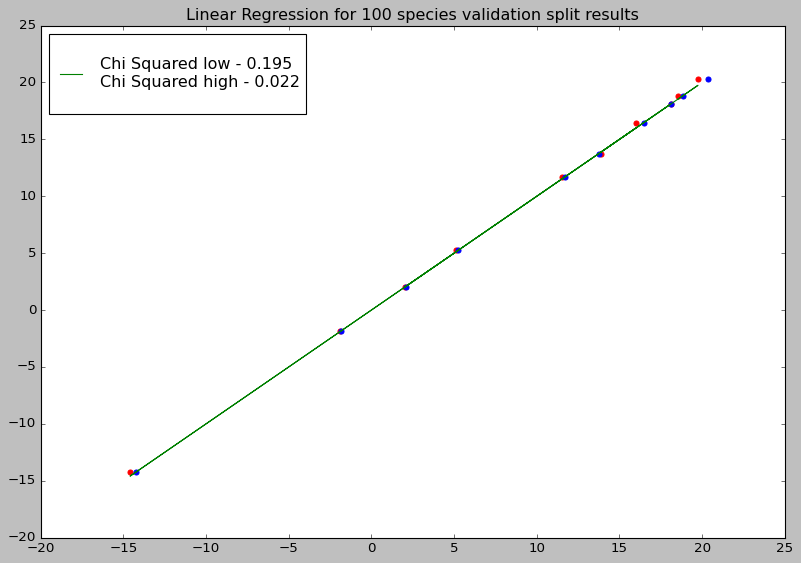

In [ ]:
plot_linear(y_val, y_val_pred, chi_squared_low, chi_squared_high)

In [ ]:
coef = lm.coef_
intercept = lm.intercept_
print(f'Coefficent: {coef[0]}, intercept: {intercept}')
print(coef)

Coefficent: 2.934432029724121, intercept: 4.9337053298950195
